In [ ]:
import pandas as pd
df=pd.read_csv('/content/qapairs_data_hausa.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import spacy
import scipy.io
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import json
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Reshape
from tensorflow.keras import Input
#from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.keras.models import model_from_json, Model,Sequential
from tensorflow.keras.utils import plot_model
from collections import defaultdict
import operator
from tensorflow.python.keras.utils import np_utils, generic_utils
#from progressbar import Bar, ETA, Percentage, ProgressBar
from itertools import zip_longest
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import Model,Input
from tensorflow.python.keras.layers.convolutional import Conv2D,Conv1D
from tensorflow.keras import initializers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow.keras.backend as k
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint,TensorBoard
from time import time
from tensorflow.keras.regularizers import l1,l2,l1_l2
from scipy.sparse import hstack
import tensorflow.keras
from tqdm import tqdm
from datetime import datetime
# import cv2
%matplotlib inline
#%tensorflow_version 1.x

In [ ]:
df=df.dropna(axis=0)
df

,gdrive_id,image_id,qa_id,ques_en,ans_en,ques_ha,ans_ha,validated
0,16l0scJ_Kpl9v4Bb6lStiYtb54KJpjmPj,2335177,460732,What color is the man's shirt?,White.,Menene launin rigar mutumin?,Fari.,1
1,1pi70_1UJQiPUMH8v5XCoYq9O2Jbo8S5d,2392303,1494576,What is attached to the Westminster palace?,A tall tower.,Menene yake maƙale a jikin fadar Westminster?,Dogon hasumiya.,1
2,14zsfI1-rZJQX01I82Y8_2_GNc5L7nSvD,2321185,886868,What are the horses walking on?,Sand.,Akan me dawakan suke tafiya?,Ƙasa.,1
3,1jq7GXboAfokdqepBxs9xBz8p6_FLbJ3T,2392923,1436743,What are the ties on top of?,Blanket.,A kan me ɗamarorin wuyan suke?,Bargo.,1
4,1m3NuivxjI8LBr58UtxNri5HJht8OKSSi,2365369,631160,Why is the ground white?,It's snowing.,Meyasa ƙasan yayi fari?,Dusar ƙanƙara ke zuba.,1
...,...,...,...,...,...,...,...,...
7864,1RN8auVeL2YlZjdsQUfeeBDwfaunP_5Yz,2363154,505060,What is the main color of the road sign?,Red.,Menene babbar launin alamar hanyar?,Ja,0
7866,1P1XstrU8cOAvhSaAWJaFKdLeLCFo13aS,2414214,1024788,How many oranges are shown?,4,Lemuka nawa aka nuna?,Huɗu,0
7867,1Ut1HIf2R1FumAAvYlQsv55cReXJPfY-Z,2377223,1981496,What is on the woman's t-shirt?,"White, purple and green letters.",Menene akan tishit din matan?,"Fari,shunayya da koren haruffa",0
7870,1FXPP6Qsavp89au8T6rsyyBhktr1J-DVv,2345589,646980,When was this photo taken?,During the day.,Yaushe aka ɗauki wannan hoton?,A cikin yini,0


In [ ]:
new_df=df.drop(['gdrive_id', 'validated','qa_id'], axis=1)


In [ ]:
new_df['label']=new_df['ans_ha']

In [ ]:
new_df

,image_id,ques_en,ans_en,ques_ha,ans_ha,label
0,2335177,What color is the man's shirt?,White.,Menene launin rigar mutumin?,Fari.,Fari.
1,2392303,What is attached to the Westminster palace?,A tall tower.,Menene yake maƙale a jikin fadar Westminster?,Dogon hasumiya.,Dogon hasumiya.
2,2321185,What are the horses walking on?,Sand.,Akan me dawakan suke tafiya?,Ƙasa.,Ƙasa.
3,2392923,What are the ties on top of?,Blanket.,A kan me ɗamarorin wuyan suke?,Bargo.,Bargo.
4,2365369,Why is the ground white?,It's snowing.,Meyasa ƙasan yayi fari?,Dusar ƙanƙara ke zuba.,Dusar ƙanƙara ke zuba.
...,...,...,...,...,...,...
7864,2363154,What is the main color of the road sign?,Red.,Menene babbar launin alamar hanyar?,Ja,Ja
7866,2414214,How many oranges are shown?,4,Lemuka nawa aka nuna?,Huɗu,Huɗu
7867,2377223,What is on the woman's t-shirt?,"White, purple and green letters.",Menene akan tishit din matan?,"Fari,shunayya da koren haruffa","Fari,shunayya da koren haruffa"
7870,2345589,When was this photo taken?,During the day.,Yaushe aka ɗauki wannan hoton?,A cikin yini,A cikin yini


In [ ]:
word_count = new_df['ques_en'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of questions')
plt.xlabel('Number of words in questions')
plt.title('Words for each question')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

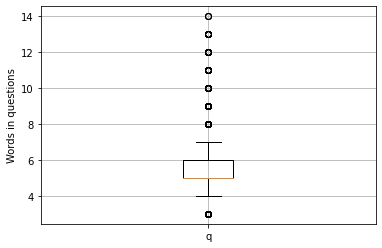

In [ ]:
que_word_count = new_df['ques_en'].str.split().apply(len)
plt.boxplot(que_word_count)
plt.xticks([1],'questions')
plt.ylabel('Words in questions')
plt.grid()
plt.show()

In [ ]:
!pip install transformers -q
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.3 MB/s eta 0:00:00


In [ ]:
import os
from copy import deepcopy
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple
from datasets import load_dataset, set_caching_enabled
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from transformers import (
    # Preprocessing / Common
    AutoTokenizer, AutoFeatureExtractor,
    # Text & Image Models (Now, image transformers like ViTModel, DeiTModel, BEiT can also be loaded using AutoModel)
    AutoModel,            
    # Training / Evaluation
    TrainingArguments, Trainer,
    # Misc
    logging
)

# import nltk
# nltk.download('wordnet')
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
# SET CACHE FOR HUGGINGFACE TRANSFORMERS + DATASETS
os.environ['HF_HOME'] = os.path.join(".", "cache")
# SET ONLY 1 GPU DEVICE
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

set_caching_enabled(True)
logging.set_verbosity_error()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
#     print('Memory Usage:')
#     print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
#     print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

cuda:0
Tesla T4


In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
label= label_encoder.fit_transform(new_df['label'])
new_df['label']=label

In [ ]:
len(new_df['label'].unique())

2991

In [ ]:
answer_space={}
count=0
for i in new_df['ans_ha']:
  answer_space[label[count]]=i
  count=count+1
answer_space

{1068: 'Fari.',
 968: 'Dogon hasumiya.',
 2931: 'Ƙasa.',
 687: 'Bargo.',
 1013: 'Dusar ƙanƙara ke zuba.',
 2382: 'Tafiya.',
 2720: 'Yin wasan frisbee.',
 1427: 'Kallon mazan suna wasan.',
 672: 'Bandajin wuyan hannu.',
 1676: 'Labule.',
 2401: 'Takwas.',
 886: 'Da rana.',
 261: 'A kan adikon goge baki.',
 1698: 'Launin tan.',
 2905: 'Ɗaya.',
 403: 'A ƙarshen titi.',
 1355: 'Ja.',
 2894: 'Ɗamarar wuya mai kintinkiri.',
 2541: 'Tumatir.',
 82: 'A bayan mutumin.',
 1963: 'Mutumin dusar ƙanƙara.',
 138: 'A cikin ruwan.',
 1099: 'Filin jirgin sama.',
 2506: 'Tsayarda pizza yayin yankawa.',
 1508: 'Katako.',
 1395: 'Jiragen leda.',
 2255: 'Shinge.',
 2281: 'Shuɗi.',
 2545: 'Tushe na uku?',
 732: 'Baƙa.',
 880: 'Da lokacin rana.',
 1738: 'Lokacin dare.',
 2264: 'Shunayya.',
 2152: 'Ruwan ƙasa.',
 1784: 'Maharban fuffuken.',
 10: '1',
 2102: 'Ruwa.',
 2721: 'Yin wasan tanis.',
 685: 'Barci.',
 1533: 'Kewaye da bangon.',
 747: 'Baƙi.',
 1949: 'Mutumi.',
 290: 'A kan kujerar.',
 2659: 'Yana isow

In [ ]:
train=new_df.iloc[:5800,:]
test=new_df.iloc[5800:,:]

In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')


In [ ]:
dataset = load_dataset(
    "csv", 
    data_files={
        "train": os.path.join("train.csv"),
        "test": os.path.join("test.csv")
    }
)


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-07641b35a56fa96b/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:

dataset = dataset.map(
    lambda examples: {
        'label': [
            ans for ans in examples['label']
        ]
    },
    batched=True
)




  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'image_id', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha', 'label'],
        num_rows: 5800
    })
    test: Dataset({
        features: ['Unnamed: 0', 'image_id', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha', 'label'],
        num_rows: 220
    })
})

In [ ]:
dataset = dataset.remove_columns(['Unnamed: 0'])

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha', 'label'],
        num_rows: 5800
    })
    test: Dataset({
        features: ['image_id', 'ques_en', 'ans_en', 'ques_ha', 'ans_ha', 'label'],
        num_rows: 220
    })
})

In [ ]:
from IPython.display import display

def showExample(train=True, id=None):
    if train:
        data = dataset["train"]
    else:
        data = dataset["test"]
    if id == None:
        id = np.random.randint(len(data))
    image = Image.open(os.path.join("drive/MyDrive/Sampled_Images.zip (Unzipped Files)/Sampled_Images/", str(data[id]["image_id"]) + ".jpg"))
    display(image)

    print("Question:\t", data[id]["ques_ha"])
    print("Answer:\t\t", data[id]["ans_ha"], "(Label: {0})".format(data[id]["label"]))

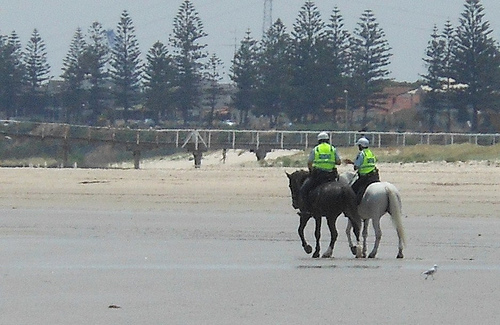

Question:	 Akan me dawakan suke tafiya?
Answer:		 Ƙasa. (Label: 2931)


In [ ]:
showExample(id=2)

In [ ]:
@dataclass
class MultimodalCollator:
    tokenizer: AutoTokenizer
    preprocessor: AutoFeatureExtractor

    def tokenize_text(self, texts: List[str]):
        encoded_text = self.tokenizer(
            text=texts,
            padding='longest',
            max_length=20,
            truncation=True,
            return_tensors='pt',
            return_token_type_ids=True,
            return_attention_mask=True,
        )
        return {
            "input_ids": encoded_text['input_ids'].squeeze(),
            "token_type_ids": encoded_text['token_type_ids'].squeeze(),
            "attention_mask": encoded_text['attention_mask'].squeeze(),
        }

    def preprocess_images(self, images: List[str]):
        processed_images = self.preprocessor(
            images=[Image.open(os.path.join("drive/MyDrive/Sampled_Images.zip (Unzipped Files)/Sampled_Images/", str(image_id) + ".jpg")).convert('RGB') for image_id in images],
            return_tensors="pt",
        )
        return {
            "pixel_values": processed_images['pixel_values'].squeeze(),
        }
            
    def __call__(self, raw_batch_dict):
        return {
            **self.tokenize_text(
                raw_batch_dict['ques_ha']
                if isinstance(raw_batch_dict, dict) else
                [i['ques_ha'] for i in raw_batch_dict]
            ),
            **self.preprocess_images(
                raw_batch_dict['image_id']
                if isinstance(raw_batch_dict, dict) else
                [i['image_id'] for i in raw_batch_dict]
            ),
            'labels': torch.tensor(
                raw_batch_dict['label']
                if isinstance(raw_batch_dict, dict) else
                [i['label'] for i in raw_batch_dict],
                dtype=torch.int64
            ),
        }

In [ ]:
class MultimodalVQAModel(nn.Module):
    def __init__(
            self,
            num_labels: int = len(answer_space),
            intermediate_dim: int = 512,
            pretrained_text_name: str = 'Davlan/bert-base-multilingual-cased-finetuned-hausa',
            pretrained_image_name: str = 'google/vit-base-patch16-224-in21k'):
     
        super(MultimodalVQAModel, self).__init__()
        self.num_labels = num_labels
        self.pretrained_text_name = pretrained_text_name
        self.pretrained_image_name = pretrained_image_name
        
        self.text_encoder = AutoModel.from_pretrained(
            self.pretrained_text_name,
        )
        self.image_encoder = AutoModel.from_pretrained(
            self.pretrained_image_name,
        )
        self.fusion = nn.Sequential(
            nn.Linear(self.text_encoder.config.hidden_size + self.image_encoder.config.hidden_size, intermediate_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
        )
        
        self.classifier = nn.Linear(intermediate_dim, self.num_labels)
        
        self.criterion = nn.CrossEntropyLoss()
    
    def forward(
            self,
            input_ids: torch.LongTensor,
            pixel_values: torch.FloatTensor,
            attention_mask: Optional[torch.LongTensor] = None,
            token_type_ids: Optional[torch.LongTensor] = None,
            labels: Optional[torch.LongTensor] = None):
        
        encoded_text = self.text_encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=True,
        )
        encoded_image = self.image_encoder(
            pixel_values=pixel_values,
            return_dict=True,
        )
        fused_output = self.fusion(
            torch.cat(
                [
                    encoded_text['pooler_output'],
                    encoded_image['pooler_output'],
                ],
                dim=1
            )
        )
        logits = self.classifier(fused_output)
        
        out = {
            "logits": logits
        }
        if labels is not None:
            loss = self.criterion(logits, labels)
            out["loss"] = loss
        
        return out

In [ ]:
def createMultimodalVQACollatorAndModel(text='Davlan/bert-base-multilingual-cased-finetuned-hausa', image='google/vit-base-patch16-224-in21k'):
    tokenizer = AutoTokenizer.from_pretrained(text)
    preprocessor = AutoFeatureExtractor.from_pretrained(image)

    multi_collator = MultimodalCollator(
        tokenizer=tokenizer,
        preprocessor=preprocessor,
    )


    multi_model = MultimodalVQAModel(pretrained_text_name=text, pretrained_image_name=image).to(device)
    return multi_collator, multi_model

In [ ]:
def wup_measure(a,b,similarity_threshold=0.925):
    """
    Returns Wu-Palmer similarity score.
    More specifically, it computes:
        max_{x \in interp(a)} max_{y \in interp(b)} wup(x,y)
        where interp is a 'interpretation field'
    """
    def get_semantic_field(a):
        weight = 1.0
        semantic_field = wordnet.synsets(a,pos=wordnet.NOUN)
        return (semantic_field,weight)


    def get_stem_word(a):
        """
        Sometimes answer has form word\d+:wordid.
        If so we return word and downweight
        """
        weight = 1.0
        return (a,weight)


    global_weight=1.0

    (a,global_weight_a)=get_stem_word(a)
    (b,global_weight_b)=get_stem_word(b)
    global_weight = min(global_weight_a,global_weight_b)

    if a==b:
        # they are the same
        return 1.0*global_weight

    if a==[] or b==[]:
        return 0


    interp_a,weight_a = get_semantic_field(a) 
    interp_b,weight_b = get_semantic_field(b)

    if interp_a == [] or interp_b == []:
        return 0

    # we take the most optimistic interpretation
    global_max=0.0
    for x in interp_a:
        for y in interp_b:
            local_score=x.wup_similarity(y)
            if local_score > global_max:
                global_max=local_score

    # we need to use the semantic fields and therefore we downweight
    # unless the score is high which indicates both are synonyms
    if global_max < similarity_threshold:
        interp_weight = 0.1
    else:
        interp_weight = 1.0

    final_score=global_max*weight_a*weight_b*interp_weight*global_weight
    return final_score

In [ ]:
def batch_wup_measure(labels, preds):
    wup_scores = [wup_measure(answer_space[label], answer_space[pred]) for label, pred in zip(labels, preds)]
    return np.mean(wup_scores)

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
labels = np.random.randint(len(answer_space), size=5)
preds = np.random.randint(len(answer_space), size=5)

def showAnswers(ids):
    print([answer_space[id] for id in ids])

showAnswers(labels)
showAnswers(preds)

print("Predictions vs Labels: ", batch_wup_measure(labels, preds))
print("Labels vs Labels: ", batch_wup_measure(labels, labels))

['Akan bencin dutse', 'Saboda kar ya shiga hanyar ta.', 'A wajan ginin.', 'Akwai hadari kadan.', 'kwala-kwale.']
['Yaro.', 'Ruwan ƙasa?', 'kare.', 'Jiragen ƙasan.', 'Da rana']
Predictions vs Labels:  0.0
Labels vs Labels:  1.0


In [ ]:
def compute_metrics(eval_tuple: Tuple[np.ndarray, np.ndarray]) -> Dict[str, float]:
    logits, labels = eval_tuple
    preds = logits.argmax(axis=-1)
    return {
        "wups": batch_wup_measure(labels, preds),
        "acc": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='macro')
    }

In [ ]:
args = TrainingArguments(
    output_dir="checkpoint",
    seed=12345, 
    evaluation_strategy="steps",
    eval_steps=100,
    logging_strategy="steps",
    logging_steps=100,
    save_strategy="steps",
    save_steps=100,
    save_total_limit=3,             # Save only the last 3 checkpoints at any given time while training 
    metric_for_best_model='wups',
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    remove_unused_columns=False,
    num_train_epochs=10,
    fp16=True,
    # warmup_ratio=0.01,
    # learning_rate=5e-4,
    # weight_decay=1e-4,
    # gradient_accumulation_steps=2,
    dataloader_num_workers=8,
    load_best_model_at_end=True,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
def createAndTrainModel(dataset, args, text_model='Davlan/bert-base-multilingual-cased-finetuned-hausa', image_model='google/vit-base-patch16-224-in21k', multimodal_model='bert_vit'):
    collator, model = createMultimodalVQACollatorAndModel(text_model, image_model)
    
    multi_args = deepcopy(args)
    multi_args.output_dir = os.path.join("checkpoint/", multimodal_model)
    multi_trainer = Trainer(
        model,
        multi_args,
        train_dataset=dataset['train'],
        eval_dataset=dataset['test'],
        data_collator=collator,
        compute_metrics=compute_metrics
    )
    
    train_multi_metrics = multi_trainer.train()
    eval_multi_metrics = multi_trainer.evaluate()
    
    return collator, model, train_multi_metrics, eval_multi_metrics

In [ ]:
collator, model, train_multi_metrics, eval_multi_metrics = createAndTrainModel(dataset, args)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Davlan--bert-base-multilingual-cased-finetuned-hausa/snapshots/e08eaa625a687776657e84c6c0a4ce5a8fabc6fd/config.json
Model config BertConfig {
  "_name_or_path": "Davlan/bert-base-multilingual-cased-finetuned-hausa",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformer

Step,Training Loss,Validation Loss,Wups,Acc,F1
100,7.714300,7.308558,0.036364,0.036364,0.000418
200,7.251200,6.937155,0.068182,0.068182,0.005293
300,6.749000,6.939107,0.077273,0.077273,0.004311
400,6.623400,6.972035,0.109091,0.109091,0.008511
500,6.450200,6.955062,0.113636,0.113636,0.010856
600,6.369600,7.074348,0.118182,0.118182,0.016022
700,6.173200,6.886922,0.122727,0.122727,0.018899
800,6.062500,7.053052,0.118182,0.118182,0.019951
900,5.942500,6.982699,0.118182,0.118182,0.010488
1000,5.883100,7.063572,0.109091,0.109091,0.013819


***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-100
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-200
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-300
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-400
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Deleting older checkpoint [checkpoint/bert_vit/checkpoint-100] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to che

Step,Training Loss,Validation Loss,Wups,Acc,F1
100,7.714300,7.308558,0.036364,0.036364,0.000418
200,7.251200,6.937155,0.068182,0.068182,0.005293
300,6.749000,6.939107,0.077273,0.077273,0.004311
400,6.623400,6.972035,0.109091,0.109091,0.008511
500,6.450200,6.955062,0.113636,0.113636,0.010856
600,6.369600,7.074348,0.118182,0.118182,0.016022
700,6.173200,6.886922,0.122727,0.122727,0.018899
800,6.062500,7.053052,0.118182,0.118182,0.019951
900,5.942500,6.982699,0.118182,0.118182,0.010488
1000,5.883100,7.063572,0.109091,0.109091,0.013819


***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-1500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Deleting older checkpoint [checkpoint/bert_vit/checkpoint-1300] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-1600
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Deleting older checkpoint [checkpoint/bert_vit/checkpoint-1400] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert_vit/checkpoint-1700
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Deleting older checkpoint [checkpoint/bert_vit/checkpoint-1500] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 220
  Batch size = 32
Saving model checkpoint to checkpoint/bert